In [1]:
"""
Paper   : https://arxiv.org/pdf/1808.00508v1.pdf
Authors : Andrew Trask, Felix Hill, Scott Reed, Jack Rae
"""

'\nPaper   : https://arxiv.org/pdf/1808.00508v1.pdf\nAuthors : Andrew Trask, Felix Hill, Scott Reed, Jack Rae\n'

## Neural Accumulator

![Neural Accumulator](https://cdn-images-1.medium.com/max/1600/1*vMYerlUvUP5gw4LDZv-aSg.png)

In [1]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NeuralAccumulator(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(NeuralAccumulator, self).__init__()
        self.W1 = Parameter(torch.Tensor(out_dim, in_dim))
        self.W2 = Parameter(torch.Tensor(out_dim, in_dim))
        self.register_parameter('bias', None)
        
        self.W = Parameter(torch.tanh(self.W1) * torch.sigmoid(self.W2))
        
        nn.init.xavier_uniform_(self.W1)
        nn.init.xavier_uniform_(self.W2)
        
    def forward(self, x):
        out = nn.functional.linear(x, self.W, self.bias)
        return out

### Neural Accumulator for Extrapolation

In [35]:
def dataset(train_size, test_size, fn):
    X = torch.Tensor(train_size + test_size, 2)
    Y = torch.Tensor(train_size + test_size, 1)

    for i in range(train_size + test_size):
        x = torch.rand(2)*10
        y = torch.tensor([fn(*x)])
        X[i] = x
        Y[i] = y
    
    X_train, y_train = X[:train_size], Y[:train_size]
    X_test, y_test = X[train_size:], Y[train_size:]
    return X_train, y_train, X_test, y_test

In [36]:
f = lambda x, y: x + y
X_train, y_train, X_test, y_test = dataset(1000, 200, f)

In [5]:
for i in range(10):
    print(f'X = {X_train[i]}\ty = {y_train[i]}')

X = tensor([ 8.1670,  3.2766])	y = tensor([ 11.4436])
X = tensor([ 4.2893,  7.3554])	y = tensor([ 11.6447])
X = tensor([ 6.0794,  3.2204])	y = tensor([ 9.2998])
X = tensor([ 9.9294,  7.8124])	y = tensor([ 17.7419])
X = tensor([ 1.0581,  4.7611])	y = tensor([ 5.8193])
X = tensor([ 3.9672,  7.2309])	y = tensor([ 11.1981])
X = tensor([ 8.4324,  8.2419])	y = tensor([ 16.6743])
X = tensor([ 5.3488,  1.8479])	y = tensor([ 7.1967])
X = tensor([ 0.3762,  8.6480])	y = tensor([ 9.0242])
X = tensor([ 1.3822,  7.9383])	y = tensor([ 9.3205])


In [7]:
nac = NeuralAccumulator(2,1)

In [8]:
nac(X_train[0])

tensor([ 4.0835])

In [9]:
optimizer = torch.optim.SGD(nac.parameters(), lr=1e-2)
crieterion = criterion = nn.MSELoss()

In [10]:
losses = []
num_iters = 1000
for i in range(1000):
    out = nac(X_train)
    loss = crieterion(out, y_train)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("\t{}/{}: loss: {:.7f} ".format(i+1, num_iters, loss.item()))


	1/1000: loss: 71.6262436 
	2/1000: loss: 4.9752316 
	3/1000: loss: 0.7317272 
	4/1000: loss: 0.3398333 
	5/1000: loss: 0.2237805 
	6/1000: loss: 0.1532919 
	7/1000: loss: 0.1053825 
	8/1000: loss: 0.0724697 
	9/1000: loss: 0.0498375 
	10/1000: loss: 0.0342734 
	11/1000: loss: 0.0235699 
	12/1000: loss: 0.0162091 
	13/1000: loss: 0.0111470 
	14/1000: loss: 0.0076658 
	15/1000: loss: 0.0052718 
	16/1000: loss: 0.0036255 
	17/1000: loss: 0.0024932 
	18/1000: loss: 0.0017146 
	19/1000: loss: 0.0011791 
	20/1000: loss: 0.0008109 
	21/1000: loss: 0.0005577 
	22/1000: loss: 0.0003835 
	23/1000: loss: 0.0002637 
	24/1000: loss: 0.0001814 
	25/1000: loss: 0.0001247 
	26/1000: loss: 0.0000858 
	27/1000: loss: 0.0000590 
	28/1000: loss: 0.0000406 
	29/1000: loss: 0.0000279 
	30/1000: loss: 0.0000192 
	31/1000: loss: 0.0000132 
	32/1000: loss: 0.0000091 
	33/1000: loss: 0.0000062 
	34/1000: loss: 0.0000043 
	35/1000: loss: 0.0000030 
	36/1000: loss: 0.0000020 
	37/1000: loss: 0.0000014 
	38/1000:

	681/1000: loss: 0.0000000 
	682/1000: loss: 0.0000000 
	683/1000: loss: 0.0000000 
	684/1000: loss: 0.0000000 
	685/1000: loss: 0.0000000 
	686/1000: loss: 0.0000000 
	687/1000: loss: 0.0000000 
	688/1000: loss: 0.0000000 
	689/1000: loss: 0.0000000 
	690/1000: loss: 0.0000000 
	691/1000: loss: 0.0000000 
	692/1000: loss: 0.0000000 
	693/1000: loss: 0.0000000 
	694/1000: loss: 0.0000000 
	695/1000: loss: 0.0000000 
	696/1000: loss: 0.0000000 
	697/1000: loss: 0.0000000 
	698/1000: loss: 0.0000000 
	699/1000: loss: 0.0000000 
	700/1000: loss: 0.0000000 
	701/1000: loss: 0.0000000 
	702/1000: loss: 0.0000000 
	703/1000: loss: 0.0000000 
	704/1000: loss: 0.0000000 
	705/1000: loss: 0.0000000 
	706/1000: loss: 0.0000000 
	707/1000: loss: 0.0000000 
	708/1000: loss: 0.0000000 
	709/1000: loss: 0.0000000 
	710/1000: loss: 0.0000000 
	711/1000: loss: 0.0000000 
	712/1000: loss: 0.0000000 
	713/1000: loss: 0.0000000 
	714/1000: loss: 0.0000000 
	715/1000: loss: 0.0000000 
	716/1000: loss: 0.0

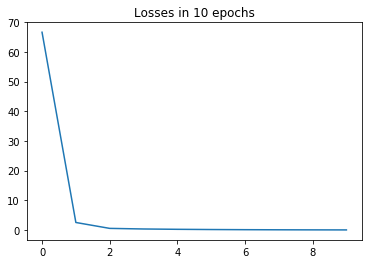

In [54]:
plt.plot(losses[:10])
plt.title('Losses in 10 epochs')
plt.show()

In [59]:
with torch.no_grad():
    train_out = nac(X_train)
    train_loss = crieterion(train_out, y_train)
    print(f'train loss = {train_loss}')

train loss = 9.989236000873536e-13


In [60]:
with torch.no_grad():
    test_out = nac(X_test)
    test_loss = crieterion(test_out, y_test)
    print(f'test loss = {test_loss}')

test loss = 9.74864611778814e-13


### Neural Accumulator vs MLP

In [81]:
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_dim, 10)
        self.fc2 = nn.Linear(10, out_dim)
        self.relu = nn.ReLU()
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return self.relu(out)

In [82]:
mlp = MLP(2, 1)

In [83]:
mlp(X_train[0])

tensor([ 0.])

In [ ]:
mlp_losses = []
num_iters = 100000
for i in range(num_iters):
    out = mlp(X_train)
    loss = crieterion(out, y_train)
    mlp_losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i% 1000 == 0:
        print("\t{}/{}: mlp loss: {:.7f} ".format(i+1, num_iters, loss.item()))

	1/100000: mlp loss: 116.6307526 
	1001/100000: mlp loss: 116.6307526 
	2001/100000: mlp loss: 116.6307526 
	3001/100000: mlp loss: 116.6307526 
	4001/100000: mlp loss: 116.6307526 
	5001/100000: mlp loss: 116.6307526 
	6001/100000: mlp loss: 116.6307526 
	7001/100000: mlp loss: 116.6307526 
	8001/100000: mlp loss: 116.6307526 
	9001/100000: mlp loss: 116.6307526 
	10001/100000: mlp loss: 116.6307526 
	11001/100000: mlp loss: 116.6307526 
	12001/100000: mlp loss: 116.6307526 
	13001/100000: mlp loss: 116.6307526 
	14001/100000: mlp loss: 116.6307526 
	15001/100000: mlp loss: 116.6307526 
	16001/100000: mlp loss: 116.6307526 
	17001/100000: mlp loss: 116.6307526 
	18001/100000: mlp loss: 116.6307526 
	19001/100000: mlp loss: 116.6307526 
	20001/100000: mlp loss: 116.6307526 
	21001/100000: mlp loss: 116.6307526 
	22001/100000: mlp loss: 116.6307526 
	23001/100000: mlp loss: 116.6307526 
	24001/100000: mlp loss: 116.6307526 
	25001/100000: mlp loss: 116.6307526 
	26001/100000: mlp loss: 

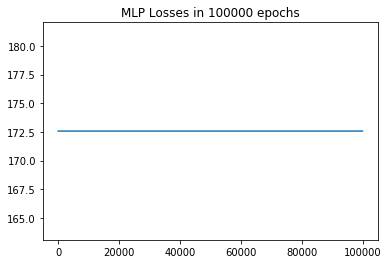

In [76]:
plt.plot(mlp_losses)
plt.title('MLP Losses in 100000 epochs')
plt.show()

##  Neural Arithmetic Logic Unit Cell 
![](https://cdn-images-1.medium.com/max/1200/1*enYojyC0tBLv9BIJWkYVRg.png)

In [17]:
class NALU(nn.Module):
    def __init__(self, in_dim, out_dim, e=1e-5):
        super(NALU, self).__init__()
        self.e = e
        self.G = Parameter(torch.Tensor(out_dim, in_dim))
        self.W = Parameter(torch.Tensor(out_dim, in_dim))
        self.register_parameter('Gbias', None)
        self.register_parameter('Wbias', None)
        self.nac = NeuralAccumulator(in_dim, out_dim)
        
        nn.init.xavier_uniform_(self.G)
        nn.init.xavier_uniform_(self.W)
        
    def forward(self, x):
        a = self.nac(x)
        g = torch.sigmoid(nn.functional.linear(x, self.G, self.Gbias))
        m = torch.exp(nn.functional.linear(torch.log(torch.abs(x) + self.e), self.W, self.Wbias))
        out = g*a + (1-g)*m
        return out

In [48]:
nalu = NALU(2, 1)

In [49]:
nalu(X_train[0])

tensor([ 0.2915])

In [52]:
optimizer = torch.optim.SGD(nalu.parameters(), lr=1e-3)
crieterion = criterion = nn.MSELoss()

In [53]:
losses = []
num_iters = 1000
for i in range(1000):
    out = nalu(X_train)
    loss = crieterion(out, y_train)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("\t{}/{}: loss: {:.7f} ".format(i+1, num_iters, loss.item()))


	1/1000: loss: 86.1885147 
	2/1000: loss: 83.8575058 
	3/1000: loss: 81.1568146 
	4/1000: loss: 77.9672470 
	5/1000: loss: 74.1159286 
	6/1000: loss: 69.3471603 
	7/1000: loss: 63.2889709 
	8/1000: loss: 55.4406624 
	9/1000: loss: 45.3223381 
	10/1000: loss: 33.2539139 
	11/1000: loss: 22.3852730 
	12/1000: loss: 18.0476742 
	13/1000: loss: 17.7269783 
	14/1000: loss: 17.5389996 
	15/1000: loss: 17.3576832 
	16/1000: loss: 17.1794262 
	17/1000: loss: 17.0036926 
	18/1000: loss: 16.8303165 
	19/1000: loss: 16.6590385 
	20/1000: loss: 16.4897327 
	21/1000: loss: 16.3222523 
	22/1000: loss: 16.1564922 
	23/1000: loss: 15.9923201 
	24/1000: loss: 15.8296814 
	25/1000: loss: 15.6684923 
	26/1000: loss: 15.5086575 
	27/1000: loss: 15.3501530 
	28/1000: loss: 15.1929226 
	29/1000: loss: 15.0369081 
	30/1000: loss: 14.8820839 
	31/1000: loss: 14.7284079 
	32/1000: loss: 14.5758610 
	33/1000: loss: 14.4244146 
	34/1000: loss: 14.2740135 
	35/1000: loss: 14.1246872 
	36/1000: loss: 13.9763975 
	

	424/1000: loss: 0.4201420 
	425/1000: loss: 0.4178094 
	426/1000: loss: 0.4154904 
	427/1000: loss: 0.4131850 
	428/1000: loss: 0.4108925 
	429/1000: loss: 0.4086132 
	430/1000: loss: 0.4063477 
	431/1000: loss: 0.4040948 
	432/1000: loss: 0.4018553 
	433/1000: loss: 0.3996289 
	434/1000: loss: 0.3974157 
	435/1000: loss: 0.3952157 
	436/1000: loss: 0.3930287 
	437/1000: loss: 0.3908553 
	438/1000: loss: 0.3886943 
	439/1000: loss: 0.3865467 
	440/1000: loss: 0.3844124 
	441/1000: loss: 0.3822907 
	442/1000: loss: 0.3801820 
	443/1000: loss: 0.3780869 
	444/1000: loss: 0.3760040 
	445/1000: loss: 0.3739341 
	446/1000: loss: 0.3718778 
	447/1000: loss: 0.3698340 
	448/1000: loss: 0.3678028 
	449/1000: loss: 0.3657849 
	450/1000: loss: 0.3637792 
	451/1000: loss: 0.3617867 
	452/1000: loss: 0.3598064 
	453/1000: loss: 0.3578394 
	454/1000: loss: 0.3558848 
	455/1000: loss: 0.3539430 
	456/1000: loss: 0.3520134 
	457/1000: loss: 0.3500964 
	458/1000: loss: 0.3481921 
	459/1000: loss: 0.3

	798/1000: loss: 0.1030781 
	799/1000: loss: 0.1028655 
	800/1000: loss: 0.1026540 
	801/1000: loss: 0.1024433 
	802/1000: loss: 0.1022334 
	803/1000: loss: 0.1020245 
	804/1000: loss: 0.1018163 
	805/1000: loss: 0.1016090 
	806/1000: loss: 0.1014026 
	807/1000: loss: 0.1011971 
	808/1000: loss: 0.1009923 
	809/1000: loss: 0.1007885 
	810/1000: loss: 0.1005854 
	811/1000: loss: 0.1003831 
	812/1000: loss: 0.1001817 
	813/1000: loss: 0.0999811 
	814/1000: loss: 0.0997813 
	815/1000: loss: 0.0995823 
	816/1000: loss: 0.0993840 
	817/1000: loss: 0.0991866 
	818/1000: loss: 0.0989899 
	819/1000: loss: 0.0987940 
	820/1000: loss: 0.0985989 
	821/1000: loss: 0.0984046 
	822/1000: loss: 0.0982110 
	823/1000: loss: 0.0980181 
	824/1000: loss: 0.0978260 
	825/1000: loss: 0.0976346 
	826/1000: loss: 0.0974440 
	827/1000: loss: 0.0972542 
	828/1000: loss: 0.0970650 
	829/1000: loss: 0.0968766 
	830/1000: loss: 0.0966888 
	831/1000: loss: 0.0965018 
	832/1000: loss: 0.0963155 
	833/1000: loss: 0.0

## Neural Arithmetic Logic Unit vs Neural Accumulator

In [138]:
f = lambda x, y: x * y
X_train, y_train, X_test, y_test = dataset(1000, 200, f)

In [139]:
nac_mul = NeuralAccumulator(2,1)

In [140]:
nac_mul(X_train[0])

tensor([ 1.1803])

In [141]:
optimizer = torch.optim.SGD(nac_mul.parameters(), lr=1e-4)
criterion = nn.MSELoss()

In [142]:
losses = []
num_iters = 10000
for i in range(num_iters):
    out = nac_mul(X_train)
    loss = crieterion(out, y_train)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("\t{}/{}: loss: {:.7f} ".format(i+1, num_iters, loss.item()))


	1/10000: loss: 891.6606445 
	2/10000: loss: 875.1476440 
	3/10000: loss: 859.0047607 
	4/10000: loss: 843.2229004 
	5/10000: loss: 827.7930908 
	6/10000: loss: 812.7118530 
	7/10000: loss: 797.9669189 
	8/10000: loss: 783.5520020 
	9/10000: loss: 769.4608765 
	10/10000: loss: 755.6846313 
	11/10000: loss: 742.2164917 
	12/10000: loss: 729.0501099 
	13/10000: loss: 716.1794434 
	14/10000: loss: 703.5966187 
	15/10000: loss: 691.2947388 
	16/10000: loss: 679.2688599 
	17/10000: loss: 667.5124512 
	18/10000: loss: 656.0187988 
	19/10000: loss: 644.7828369 
	20/10000: loss: 633.7996826 
	21/10000: loss: 623.0604858 
	22/10000: loss: 612.5626831 
	23/10000: loss: 602.2998657 
	24/10000: loss: 592.2670898 
	25/10000: loss: 582.4590454 
	26/10000: loss: 572.8697510 
	27/10000: loss: 563.4956665 
	28/10000: loss: 554.3322144 
	29/10000: loss: 545.3728027 
	30/10000: loss: 536.6144409 
	31/10000: loss: 528.0522461 
	32/10000: loss: 519.6816406 
	33/10000: loss: 511.4988708 
	34/10000: loss: 50

	607/10000: loss: 152.8637390 
	608/10000: loss: 152.8625641 
	609/10000: loss: 152.8614349 
	610/10000: loss: 152.8604584 
	611/10000: loss: 152.8592377 
	612/10000: loss: 152.8580170 
	613/10000: loss: 152.8569489 
	614/10000: loss: 152.8558960 
	615/10000: loss: 152.8547974 
	616/10000: loss: 152.8535004 
	617/10000: loss: 152.8524628 
	618/10000: loss: 152.8514557 
	619/10000: loss: 152.8503418 
	620/10000: loss: 152.8493805 
	621/10000: loss: 152.8482971 
	622/10000: loss: 152.8470154 
	623/10000: loss: 152.8459778 
	624/10000: loss: 152.8448486 
	625/10000: loss: 152.8438721 
	626/10000: loss: 152.8427124 
	627/10000: loss: 152.8417969 
	628/10000: loss: 152.8407440 
	629/10000: loss: 152.8396149 
	630/10000: loss: 152.8385773 
	631/10000: loss: 152.8377380 
	632/10000: loss: 152.8366699 
	633/10000: loss: 152.8355408 
	634/10000: loss: 152.8344116 
	635/10000: loss: 152.8333435 
	636/10000: loss: 152.8323669 
	637/10000: loss: 152.8312683 
	638/10000: loss: 152.8303375 
	639/100

	1262/10000: loss: 152.5626984 
	1263/10000: loss: 152.5626373 
	1264/10000: loss: 152.5624542 
	1265/10000: loss: 152.5623322 
	1266/10000: loss: 152.5622406 
	1267/10000: loss: 152.5621338 
	1268/10000: loss: 152.5619659 
	1269/10000: loss: 152.5618591 
	1270/10000: loss: 152.5617218 
	1271/10000: loss: 152.5617065 
	1272/10000: loss: 152.5614014 
	1273/10000: loss: 152.5612488 
	1274/10000: loss: 152.5610809 
	1275/10000: loss: 152.5611420 
	1276/10000: loss: 152.5609894 
	1277/10000: loss: 152.5609131 
	1278/10000: loss: 152.5606079 
	1279/10000: loss: 152.5606689 
	1280/10000: loss: 152.5604553 
	1281/10000: loss: 152.5603027 
	1282/10000: loss: 152.5602417 
	1283/10000: loss: 152.5601501 
	1284/10000: loss: 152.5600128 
	1285/10000: loss: 152.5599518 
	1286/10000: loss: 152.5597992 
	1287/10000: loss: 152.5596008 
	1288/10000: loss: 152.5594330 
	1289/10000: loss: 152.5593262 
	1290/10000: loss: 152.5592194 
	1291/10000: loss: 152.5591583 
	1292/10000: loss: 152.5590973 
	1293/10

	1969/10000: loss: 152.5274963 
	1970/10000: loss: 152.5275574 
	1971/10000: loss: 152.5275421 
	1972/10000: loss: 152.5273743 
	1973/10000: loss: 152.5274200 
	1974/10000: loss: 152.5274811 
	1975/10000: loss: 152.5275269 
	1976/10000: loss: 152.5274200 
	1977/10000: loss: 152.5272980 
	1978/10000: loss: 152.5273132 
	1979/10000: loss: 152.5273285 
	1980/10000: loss: 152.5273438 
	1981/10000: loss: 152.5273438 
	1982/10000: loss: 152.5273743 
	1983/10000: loss: 152.5273438 
	1984/10000: loss: 152.5274353 
	1985/10000: loss: 152.5273285 
	1986/10000: loss: 152.5272369 
	1987/10000: loss: 152.5272217 
	1988/10000: loss: 152.5272369 
	1989/10000: loss: 152.5272064 
	1990/10000: loss: 152.5272675 
	1991/10000: loss: 152.5273285 
	1992/10000: loss: 152.5272675 
	1993/10000: loss: 152.5272369 
	1994/10000: loss: 152.5271759 
	1995/10000: loss: 152.5271912 
	1996/10000: loss: 152.5272980 
	1997/10000: loss: 152.5272980 
	1998/10000: loss: 152.5272980 
	1999/10000: loss: 152.5271912 
	2000/10

	2688/10000: loss: 152.5240021 
	2689/10000: loss: 152.5239563 
	2690/10000: loss: 152.5239868 
	2691/10000: loss: 152.5238953 
	2692/10000: loss: 152.5238800 
	2693/10000: loss: 152.5238495 
	2694/10000: loss: 152.5239105 
	2695/10000: loss: 152.5239868 
	2696/10000: loss: 152.5240173 
	2697/10000: loss: 152.5240173 
	2698/10000: loss: 152.5239258 
	2699/10000: loss: 152.5239410 
	2700/10000: loss: 152.5238800 
	2701/10000: loss: 152.5238953 
	2702/10000: loss: 152.5239258 
	2703/10000: loss: 152.5239868 
	2704/10000: loss: 152.5239105 
	2705/10000: loss: 152.5238800 
	2706/10000: loss: 152.5238495 
	2707/10000: loss: 152.5239410 
	2708/10000: loss: 152.5239716 
	2709/10000: loss: 152.5239258 
	2710/10000: loss: 152.5239716 
	2711/10000: loss: 152.5239563 
	2712/10000: loss: 152.5238953 
	2713/10000: loss: 152.5239258 
	2714/10000: loss: 152.5239716 
	2715/10000: loss: 152.5239868 
	2716/10000: loss: 152.5240173 
	2717/10000: loss: 152.5239563 
	2718/10000: loss: 152.5238953 
	2719/10

	3362/10000: loss: 152.5237732 
	3363/10000: loss: 152.5237885 
	3364/10000: loss: 152.5237274 
	3365/10000: loss: 152.5237732 
	3366/10000: loss: 152.5237885 
	3367/10000: loss: 152.5237885 
	3368/10000: loss: 152.5238037 
	3369/10000: loss: 152.5238190 
	3370/10000: loss: 152.5238495 
	3371/10000: loss: 152.5238342 
	3372/10000: loss: 152.5238037 
	3373/10000: loss: 152.5237732 
	3374/10000: loss: 152.5238037 
	3375/10000: loss: 152.5238800 
	3376/10000: loss: 152.5238342 
	3377/10000: loss: 152.5237885 
	3378/10000: loss: 152.5237732 
	3379/10000: loss: 152.5237427 
	3380/10000: loss: 152.5237885 
	3381/10000: loss: 152.5238037 
	3382/10000: loss: 152.5238190 
	3383/10000: loss: 152.5238800 
	3384/10000: loss: 152.5238647 
	3385/10000: loss: 152.5238495 
	3386/10000: loss: 152.5238495 
	3387/10000: loss: 152.5238342 
	3388/10000: loss: 152.5238800 
	3389/10000: loss: 152.5238495 
	3390/10000: loss: 152.5238342 
	3391/10000: loss: 152.5238342 
	3392/10000: loss: 152.5238495 
	3393/10

	4014/10000: loss: 152.5237732 
	4015/10000: loss: 152.5238037 
	4016/10000: loss: 152.5237427 
	4017/10000: loss: 152.5237122 
	4018/10000: loss: 152.5237122 
	4019/10000: loss: 152.5237122 
	4020/10000: loss: 152.5237274 
	4021/10000: loss: 152.5237122 
	4022/10000: loss: 152.5236664 
	4023/10000: loss: 152.5236969 
	4024/10000: loss: 152.5236816 
	4025/10000: loss: 152.5236816 
	4026/10000: loss: 152.5236664 
	4027/10000: loss: 152.5236359 
	4028/10000: loss: 152.5236359 
	4029/10000: loss: 152.5236511 
	4030/10000: loss: 152.5236664 
	4031/10000: loss: 152.5235901 
	4032/10000: loss: 152.5236053 
	4033/10000: loss: 152.5236359 
	4034/10000: loss: 152.5236664 
	4035/10000: loss: 152.5236816 
	4036/10000: loss: 152.5236816 
	4037/10000: loss: 152.5236816 
	4038/10000: loss: 152.5236511 
	4039/10000: loss: 152.5236664 
	4040/10000: loss: 152.5236816 
	4041/10000: loss: 152.5236969 
	4042/10000: loss: 152.5237274 
	4043/10000: loss: 152.5237732 
	4044/10000: loss: 152.5237427 
	4045/10

	4681/10000: loss: 152.5237122 
	4682/10000: loss: 152.5237122 
	4683/10000: loss: 152.5237122 
	4684/10000: loss: 152.5236816 
	4685/10000: loss: 152.5236816 
	4686/10000: loss: 152.5236511 
	4687/10000: loss: 152.5236664 
	4688/10000: loss: 152.5236816 
	4689/10000: loss: 152.5236816 
	4690/10000: loss: 152.5236816 
	4691/10000: loss: 152.5236816 
	4692/10000: loss: 152.5236816 
	4693/10000: loss: 152.5236969 
	4694/10000: loss: 152.5236816 
	4695/10000: loss: 152.5236816 
	4696/10000: loss: 152.5236816 
	4697/10000: loss: 152.5236816 
	4698/10000: loss: 152.5236816 
	4699/10000: loss: 152.5236664 
	4700/10000: loss: 152.5236664 
	4701/10000: loss: 152.5236664 
	4702/10000: loss: 152.5236511 
	4703/10000: loss: 152.5236664 
	4704/10000: loss: 152.5236664 
	4705/10000: loss: 152.5236816 
	4706/10000: loss: 152.5236816 
	4707/10000: loss: 152.5237122 
	4708/10000: loss: 152.5236969 
	4709/10000: loss: 152.5237122 
	4710/10000: loss: 152.5236816 
	4711/10000: loss: 152.5236511 
	4712/10

	5317/10000: loss: 152.5235901 
	5318/10000: loss: 152.5235901 
	5319/10000: loss: 152.5235901 
	5320/10000: loss: 152.5235901 
	5321/10000: loss: 152.5235901 
	5322/10000: loss: 152.5235901 
	5323/10000: loss: 152.5235901 
	5324/10000: loss: 152.5235901 
	5325/10000: loss: 152.5235901 
	5326/10000: loss: 152.5235901 
	5327/10000: loss: 152.5235901 
	5328/10000: loss: 152.5235901 
	5329/10000: loss: 152.5235901 
	5330/10000: loss: 152.5235901 
	5331/10000: loss: 152.5235901 
	5332/10000: loss: 152.5235901 
	5333/10000: loss: 152.5235901 
	5334/10000: loss: 152.5235901 
	5335/10000: loss: 152.5235901 
	5336/10000: loss: 152.5235901 
	5337/10000: loss: 152.5235901 
	5338/10000: loss: 152.5235901 
	5339/10000: loss: 152.5235901 
	5340/10000: loss: 152.5235901 
	5341/10000: loss: 152.5235901 
	5342/10000: loss: 152.5235901 
	5343/10000: loss: 152.5235901 
	5344/10000: loss: 152.5235901 
	5345/10000: loss: 152.5235901 
	5346/10000: loss: 152.5235901 
	5347/10000: loss: 152.5235901 
	5348/10

	6060/10000: loss: 152.5235901 
	6061/10000: loss: 152.5235901 
	6062/10000: loss: 152.5235901 
	6063/10000: loss: 152.5235901 
	6064/10000: loss: 152.5235901 
	6065/10000: loss: 152.5235901 
	6066/10000: loss: 152.5235901 
	6067/10000: loss: 152.5235901 
	6068/10000: loss: 152.5235901 
	6069/10000: loss: 152.5235901 
	6070/10000: loss: 152.5235901 
	6071/10000: loss: 152.5235901 
	6072/10000: loss: 152.5235901 
	6073/10000: loss: 152.5235901 
	6074/10000: loss: 152.5235901 
	6075/10000: loss: 152.5235901 
	6076/10000: loss: 152.5235901 
	6077/10000: loss: 152.5235901 
	6078/10000: loss: 152.5235901 
	6079/10000: loss: 152.5235901 
	6080/10000: loss: 152.5235901 
	6081/10000: loss: 152.5235901 
	6082/10000: loss: 152.5235901 
	6083/10000: loss: 152.5235901 
	6084/10000: loss: 152.5235901 
	6085/10000: loss: 152.5235901 
	6086/10000: loss: 152.5235901 
	6087/10000: loss: 152.5235901 
	6088/10000: loss: 152.5235901 
	6089/10000: loss: 152.5235901 
	6090/10000: loss: 152.5235901 
	6091/10

	6771/10000: loss: 152.5235901 
	6772/10000: loss: 152.5235901 
	6773/10000: loss: 152.5235901 
	6774/10000: loss: 152.5235901 
	6775/10000: loss: 152.5235901 
	6776/10000: loss: 152.5235901 
	6777/10000: loss: 152.5235901 
	6778/10000: loss: 152.5235901 
	6779/10000: loss: 152.5235901 
	6780/10000: loss: 152.5235901 
	6781/10000: loss: 152.5235901 
	6782/10000: loss: 152.5235901 
	6783/10000: loss: 152.5235901 
	6784/10000: loss: 152.5235901 
	6785/10000: loss: 152.5235901 
	6786/10000: loss: 152.5235901 
	6787/10000: loss: 152.5235901 
	6788/10000: loss: 152.5235901 
	6789/10000: loss: 152.5235901 
	6790/10000: loss: 152.5235901 
	6791/10000: loss: 152.5235901 
	6792/10000: loss: 152.5235901 
	6793/10000: loss: 152.5235901 
	6794/10000: loss: 152.5235901 
	6795/10000: loss: 152.5235901 
	6796/10000: loss: 152.5235901 
	6797/10000: loss: 152.5235901 
	6798/10000: loss: 152.5235901 
	6799/10000: loss: 152.5235901 
	6800/10000: loss: 152.5235901 
	6801/10000: loss: 152.5235901 
	6802/10

	7371/10000: loss: 152.5235901 
	7372/10000: loss: 152.5235901 
	7373/10000: loss: 152.5235901 
	7374/10000: loss: 152.5235901 
	7375/10000: loss: 152.5235901 
	7376/10000: loss: 152.5235901 
	7377/10000: loss: 152.5235901 
	7378/10000: loss: 152.5235901 
	7379/10000: loss: 152.5235901 
	7380/10000: loss: 152.5235901 
	7381/10000: loss: 152.5235901 
	7382/10000: loss: 152.5235901 
	7383/10000: loss: 152.5235901 
	7384/10000: loss: 152.5235901 
	7385/10000: loss: 152.5235901 
	7386/10000: loss: 152.5235901 
	7387/10000: loss: 152.5235901 
	7388/10000: loss: 152.5235901 
	7389/10000: loss: 152.5235901 
	7390/10000: loss: 152.5235901 
	7391/10000: loss: 152.5235901 
	7392/10000: loss: 152.5235901 
	7393/10000: loss: 152.5235901 
	7394/10000: loss: 152.5235901 
	7395/10000: loss: 152.5235901 
	7396/10000: loss: 152.5235901 
	7397/10000: loss: 152.5235901 
	7398/10000: loss: 152.5235901 
	7399/10000: loss: 152.5235901 
	7400/10000: loss: 152.5235901 
	7401/10000: loss: 152.5235901 
	7402/10

	8103/10000: loss: 152.5235901 
	8104/10000: loss: 152.5235901 
	8105/10000: loss: 152.5235901 
	8106/10000: loss: 152.5235901 
	8107/10000: loss: 152.5235901 
	8108/10000: loss: 152.5235901 
	8109/10000: loss: 152.5235901 
	8110/10000: loss: 152.5235901 
	8111/10000: loss: 152.5235901 
	8112/10000: loss: 152.5235901 
	8113/10000: loss: 152.5235901 
	8114/10000: loss: 152.5235901 
	8115/10000: loss: 152.5235901 
	8116/10000: loss: 152.5235901 
	8117/10000: loss: 152.5235901 
	8118/10000: loss: 152.5235901 
	8119/10000: loss: 152.5235901 
	8120/10000: loss: 152.5235901 
	8121/10000: loss: 152.5235901 
	8122/10000: loss: 152.5235901 
	8123/10000: loss: 152.5235901 
	8124/10000: loss: 152.5235901 
	8125/10000: loss: 152.5235901 
	8126/10000: loss: 152.5235901 
	8127/10000: loss: 152.5235901 
	8128/10000: loss: 152.5235901 
	8129/10000: loss: 152.5235901 
	8130/10000: loss: 152.5235901 
	8131/10000: loss: 152.5235901 
	8132/10000: loss: 152.5235901 
	8133/10000: loss: 152.5235901 
	8134/10

	8800/10000: loss: 152.5235901 
	8801/10000: loss: 152.5235901 
	8802/10000: loss: 152.5235901 
	8803/10000: loss: 152.5235901 
	8804/10000: loss: 152.5235901 
	8805/10000: loss: 152.5235901 
	8806/10000: loss: 152.5235901 
	8807/10000: loss: 152.5235901 
	8808/10000: loss: 152.5235901 
	8809/10000: loss: 152.5235901 
	8810/10000: loss: 152.5235901 
	8811/10000: loss: 152.5235901 
	8812/10000: loss: 152.5235901 
	8813/10000: loss: 152.5235901 
	8814/10000: loss: 152.5235901 
	8815/10000: loss: 152.5235901 
	8816/10000: loss: 152.5235901 
	8817/10000: loss: 152.5235901 
	8818/10000: loss: 152.5235901 
	8819/10000: loss: 152.5235901 
	8820/10000: loss: 152.5235901 
	8821/10000: loss: 152.5235901 
	8822/10000: loss: 152.5235901 
	8823/10000: loss: 152.5235901 
	8824/10000: loss: 152.5235901 
	8825/10000: loss: 152.5235901 
	8826/10000: loss: 152.5235901 
	8827/10000: loss: 152.5235901 
	8828/10000: loss: 152.5235901 
	8829/10000: loss: 152.5235901 
	8830/10000: loss: 152.5235901 
	8831/10

	9482/10000: loss: 152.5235901 
	9483/10000: loss: 152.5235901 
	9484/10000: loss: 152.5235901 
	9485/10000: loss: 152.5235901 
	9486/10000: loss: 152.5235901 
	9487/10000: loss: 152.5235901 
	9488/10000: loss: 152.5235901 
	9489/10000: loss: 152.5235901 
	9490/10000: loss: 152.5235901 
	9491/10000: loss: 152.5235901 
	9492/10000: loss: 152.5235901 
	9493/10000: loss: 152.5235901 
	9494/10000: loss: 152.5235901 
	9495/10000: loss: 152.5235901 
	9496/10000: loss: 152.5235901 
	9497/10000: loss: 152.5235901 
	9498/10000: loss: 152.5235901 
	9499/10000: loss: 152.5235901 
	9500/10000: loss: 152.5235901 
	9501/10000: loss: 152.5235901 
	9502/10000: loss: 152.5235901 
	9503/10000: loss: 152.5235901 
	9504/10000: loss: 152.5235901 
	9505/10000: loss: 152.5235901 
	9506/10000: loss: 152.5235901 
	9507/10000: loss: 152.5235901 
	9508/10000: loss: 152.5235901 
	9509/10000: loss: 152.5235901 
	9510/10000: loss: 152.5235901 
	9511/10000: loss: 152.5235901 
	9512/10000: loss: 152.5235901 
	9513/10

In [143]:
nalu_mul = NALU(2, 1)

In [144]:
nalu_mul(X_train[0])

tensor([ 1.1853])

In [145]:
optimizer = torch.optim.SGD(nalu_mul.parameters(), lr=1e-4)
criterion = nn.MSELoss()

In [146]:
losses = []
num_iters = 10000
for i in range(num_iters):
    out = nalu_mul(X_train)
    loss = crieterion(out, y_train)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("\t{}/{}: loss: {:.7f} ".format(i+1, num_iters, loss.item()))


	1/10000: loss: 899.6254883 
	2/10000: loss: 888.4244995 
	3/10000: loss: 877.4038086 
	4/10000: loss: 866.5437622 
	5/10000: loss: 855.8271484 
	6/10000: loss: 845.2388916 
	7/10000: loss: 834.7652588 
	8/10000: loss: 824.3937988 
	9/10000: loss: 814.1135254 
	10/10000: loss: 803.9133911 
	11/10000: loss: 793.7863770 
	12/10000: loss: 783.7271729 
	13/10000: loss: 773.7281494 
	14/10000: loss: 763.7841187 
	15/10000: loss: 753.8933105 
	16/10000: loss: 744.0518188 
	17/10000: loss: 734.2592163 
	18/10000: loss: 724.5108032 
	19/10000: loss: 714.8078613 
	20/10000: loss: 705.1481323 
	21/10000: loss: 695.5305176 
	22/10000: loss: 685.9526367 
	23/10000: loss: 676.4135132 
	24/10000: loss: 666.9087524 
	25/10000: loss: 657.4341431 
	26/10000: loss: 647.9825439 
	27/10000: loss: 638.5451050 
	28/10000: loss: 629.1085205 
	29/10000: loss: 619.6533813 
	30/10000: loss: 610.1540527 
	31/10000: loss: 600.5758057 
	32/10000: loss: 590.8648682 
	33/10000: loss: 580.9497070 
	34/10000: loss: 57

	350/10000: loss: 2.3748410 
	351/10000: loss: 2.3517365 
	352/10000: loss: 2.3289793 
	353/10000: loss: 2.3065634 
	354/10000: loss: 2.2844815 
	355/10000: loss: 2.2627320 
	356/10000: loss: 2.2413020 
	357/10000: loss: 2.2201946 
	358/10000: loss: 2.1993983 
	359/10000: loss: 2.1789117 
	360/10000: loss: 2.1587284 
	361/10000: loss: 2.1388457 
	362/10000: loss: 2.1192565 
	363/10000: loss: 2.0999582 
	364/10000: loss: 2.0809438 
	365/10000: loss: 2.0622096 
	366/10000: loss: 2.0437489 
	367/10000: loss: 2.0255613 
	368/10000: loss: 2.0076420 
	369/10000: loss: 1.9899827 
	370/10000: loss: 1.9725841 
	371/10000: loss: 1.9554369 
	372/10000: loss: 1.9385390 
	373/10000: loss: 1.9218874 
	374/10000: loss: 1.9054790 
	375/10000: loss: 1.8893028 
	376/10000: loss: 1.8733646 
	377/10000: loss: 1.8576552 
	378/10000: loss: 1.8421713 
	379/10000: loss: 1.8269091 
	380/10000: loss: 1.8118645 
	381/10000: loss: 1.7970355 
	382/10000: loss: 1.7824194 
	383/10000: loss: 1.7680060 
	384/10000: lo

	709/10000: loss: 0.4586355 
	710/10000: loss: 0.4574832 
	711/10000: loss: 0.4563346 
	712/10000: loss: 0.4551915 
	713/10000: loss: 0.4540528 
	714/10000: loss: 0.4529188 
	715/10000: loss: 0.4517897 
	716/10000: loss: 0.4506653 
	717/10000: loss: 0.4495452 
	718/10000: loss: 0.4484298 
	719/10000: loss: 0.4473192 
	720/10000: loss: 0.4462124 
	721/10000: loss: 0.4451112 
	722/10000: loss: 0.4440143 
	723/10000: loss: 0.4429213 
	724/10000: loss: 0.4418330 
	725/10000: loss: 0.4407490 
	726/10000: loss: 0.4396695 
	727/10000: loss: 0.4385939 
	728/10000: loss: 0.4375232 
	729/10000: loss: 0.4364571 
	730/10000: loss: 0.4353942 
	731/10000: loss: 0.4343363 
	732/10000: loss: 0.4332822 
	733/10000: loss: 0.4322326 
	734/10000: loss: 0.4311873 
	735/10000: loss: 0.4301461 
	736/10000: loss: 0.4291087 
	737/10000: loss: 0.4280760 
	738/10000: loss: 0.4270473 
	739/10000: loss: 0.4260213 
	740/10000: loss: 0.4250016 
	741/10000: loss: 0.4239843 
	742/10000: loss: 0.4229716 
	743/10000: lo

	1053/10000: loss: 0.2303499 
	1054/10000: loss: 0.2299795 
	1055/10000: loss: 0.2296101 
	1056/10000: loss: 0.2292422 
	1057/10000: loss: 0.2288749 
	1058/10000: loss: 0.2285085 
	1059/10000: loss: 0.2281430 
	1060/10000: loss: 0.2277788 
	1061/10000: loss: 0.2274158 
	1062/10000: loss: 0.2270532 
	1063/10000: loss: 0.2266919 
	1064/10000: loss: 0.2263312 
	1065/10000: loss: 0.2259721 
	1066/10000: loss: 0.2256135 
	1067/10000: loss: 0.2252561 
	1068/10000: loss: 0.2248993 
	1069/10000: loss: 0.2245442 
	1070/10000: loss: 0.2241893 
	1071/10000: loss: 0.2238357 
	1072/10000: loss: 0.2234829 
	1073/10000: loss: 0.2231311 
	1074/10000: loss: 0.2227802 
	1075/10000: loss: 0.2224303 
	1076/10000: loss: 0.2220813 
	1077/10000: loss: 0.2217332 
	1078/10000: loss: 0.2213861 
	1079/10000: loss: 0.2210400 
	1080/10000: loss: 0.2206946 
	1081/10000: loss: 0.2203504 
	1082/10000: loss: 0.2200070 
	1083/10000: loss: 0.2196642 
	1084/10000: loss: 0.2193229 
	1085/10000: loss: 0.2189822 
	1086/1000

	1494/10000: loss: 0.1301846 
	1495/10000: loss: 0.1300491 
	1496/10000: loss: 0.1299138 
	1497/10000: loss: 0.1297788 
	1498/10000: loss: 0.1296440 
	1499/10000: loss: 0.1295095 
	1500/10000: loss: 0.1293753 
	1501/10000: loss: 0.1292413 
	1502/10000: loss: 0.1291076 
	1503/10000: loss: 0.1289742 
	1504/10000: loss: 0.1288410 
	1505/10000: loss: 0.1287080 
	1506/10000: loss: 0.1285752 
	1507/10000: loss: 0.1284429 
	1508/10000: loss: 0.1283106 
	1509/10000: loss: 0.1281787 
	1510/10000: loss: 0.1280469 
	1511/10000: loss: 0.1279156 
	1512/10000: loss: 0.1277843 
	1513/10000: loss: 0.1276534 
	1514/10000: loss: 0.1275226 
	1515/10000: loss: 0.1273922 
	1516/10000: loss: 0.1272620 
	1517/10000: loss: 0.1271321 
	1518/10000: loss: 0.1270022 
	1519/10000: loss: 0.1268727 
	1520/10000: loss: 0.1267436 
	1521/10000: loss: 0.1266146 
	1522/10000: loss: 0.1264859 
	1523/10000: loss: 0.1263573 
	1524/10000: loss: 0.1262291 
	1525/10000: loss: 0.1261011 
	1526/10000: loss: 0.1259733 
	1527/1000

	1889/10000: loss: 0.0915842 
	1890/10000: loss: 0.0915143 
	1891/10000: loss: 0.0914447 
	1892/10000: loss: 0.0913751 
	1893/10000: loss: 0.0913055 
	1894/10000: loss: 0.0912363 
	1895/10000: loss: 0.0911670 
	1896/10000: loss: 0.0910978 
	1897/10000: loss: 0.0910287 
	1898/10000: loss: 0.0909598 
	1899/10000: loss: 0.0908908 
	1900/10000: loss: 0.0908222 
	1901/10000: loss: 0.0907534 
	1902/10000: loss: 0.0906847 
	1903/10000: loss: 0.0906163 
	1904/10000: loss: 0.0905480 
	1905/10000: loss: 0.0904797 
	1906/10000: loss: 0.0904115 
	1907/10000: loss: 0.0903434 
	1908/10000: loss: 0.0902755 
	1909/10000: loss: 0.0902075 
	1910/10000: loss: 0.0901397 
	1911/10000: loss: 0.0900720 
	1912/10000: loss: 0.0900045 
	1913/10000: loss: 0.0899370 
	1914/10000: loss: 0.0898697 
	1915/10000: loss: 0.0898024 
	1916/10000: loss: 0.0897352 
	1917/10000: loss: 0.0896681 
	1918/10000: loss: 0.0896011 
	1919/10000: loss: 0.0895343 
	1920/10000: loss: 0.0894674 
	1921/10000: loss: 0.0894008 
	1922/1000

	2280/10000: loss: 0.0704615 
	2281/10000: loss: 0.0704199 
	2282/10000: loss: 0.0703783 
	2283/10000: loss: 0.0703368 
	2284/10000: loss: 0.0702954 
	2285/10000: loss: 0.0702540 
	2286/10000: loss: 0.0702126 
	2287/10000: loss: 0.0701713 
	2288/10000: loss: 0.0701300 
	2289/10000: loss: 0.0700888 
	2290/10000: loss: 0.0700476 
	2291/10000: loss: 0.0700065 
	2292/10000: loss: 0.0699654 
	2293/10000: loss: 0.0699244 
	2294/10000: loss: 0.0698834 
	2295/10000: loss: 0.0698425 
	2296/10000: loss: 0.0698016 
	2297/10000: loss: 0.0697608 
	2298/10000: loss: 0.0697200 
	2299/10000: loss: 0.0696792 
	2300/10000: loss: 0.0696385 
	2301/10000: loss: 0.0695979 
	2302/10000: loss: 0.0695573 
	2303/10000: loss: 0.0695168 
	2304/10000: loss: 0.0694763 
	2305/10000: loss: 0.0694358 
	2306/10000: loss: 0.0693954 
	2307/10000: loss: 0.0693550 
	2308/10000: loss: 0.0693147 
	2309/10000: loss: 0.0692745 
	2310/10000: loss: 0.0692344 
	2311/10000: loss: 0.0691941 
	2312/10000: loss: 0.0691540 
	2313/1000

	2675/10000: loss: 0.0571612 
	2676/10000: loss: 0.0571341 
	2677/10000: loss: 0.0571070 
	2678/10000: loss: 0.0570798 
	2679/10000: loss: 0.0570527 
	2680/10000: loss: 0.0570257 
	2681/10000: loss: 0.0569986 
	2682/10000: loss: 0.0569716 
	2683/10000: loss: 0.0569447 
	2684/10000: loss: 0.0569177 
	2685/10000: loss: 0.0568907 
	2686/10000: loss: 0.0568639 
	2687/10000: loss: 0.0568370 
	2688/10000: loss: 0.0568101 
	2689/10000: loss: 0.0567833 
	2690/10000: loss: 0.0567565 
	2691/10000: loss: 0.0567298 
	2692/10000: loss: 0.0567030 
	2693/10000: loss: 0.0566762 
	2694/10000: loss: 0.0566496 
	2695/10000: loss: 0.0566229 
	2696/10000: loss: 0.0565963 
	2697/10000: loss: 0.0565697 
	2698/10000: loss: 0.0565430 
	2699/10000: loss: 0.0565165 
	2700/10000: loss: 0.0564899 
	2701/10000: loss: 0.0564634 
	2702/10000: loss: 0.0564369 
	2703/10000: loss: 0.0564105 
	2704/10000: loss: 0.0563841 
	2705/10000: loss: 0.0563576 
	2706/10000: loss: 0.0563313 
	2707/10000: loss: 0.0563049 
	2708/1000

	3095/10000: loss: 0.0477076 
	3096/10000: loss: 0.0476890 
	3097/10000: loss: 0.0476704 
	3098/10000: loss: 0.0476518 
	3099/10000: loss: 0.0476333 
	3100/10000: loss: 0.0476148 
	3101/10000: loss: 0.0475962 
	3102/10000: loss: 0.0475777 
	3103/10000: loss: 0.0475592 
	3104/10000: loss: 0.0475407 
	3105/10000: loss: 0.0475222 
	3106/10000: loss: 0.0475038 
	3107/10000: loss: 0.0474853 
	3108/10000: loss: 0.0474669 
	3109/10000: loss: 0.0474485 
	3110/10000: loss: 0.0474301 
	3111/10000: loss: 0.0474117 
	3112/10000: loss: 0.0473933 
	3113/10000: loss: 0.0473750 
	3114/10000: loss: 0.0473566 
	3115/10000: loss: 0.0473383 
	3116/10000: loss: 0.0473200 
	3117/10000: loss: 0.0473017 
	3118/10000: loss: 0.0472835 
	3119/10000: loss: 0.0472652 
	3120/10000: loss: 0.0472469 
	3121/10000: loss: 0.0472287 
	3122/10000: loss: 0.0472105 
	3123/10000: loss: 0.0471923 
	3124/10000: loss: 0.0471741 
	3125/10000: loss: 0.0471559 
	3126/10000: loss: 0.0471377 
	3127/10000: loss: 0.0471196 
	3128/1000

	3507/10000: loss: 0.0411555 
	3508/10000: loss: 0.0411419 
	3509/10000: loss: 0.0411283 
	3510/10000: loss: 0.0411148 
	3511/10000: loss: 0.0411012 
	3512/10000: loss: 0.0410877 
	3513/10000: loss: 0.0410742 
	3514/10000: loss: 0.0410606 
	3515/10000: loss: 0.0410472 
	3516/10000: loss: 0.0410337 
	3517/10000: loss: 0.0410202 
	3518/10000: loss: 0.0410067 
	3519/10000: loss: 0.0409933 
	3520/10000: loss: 0.0409798 
	3521/10000: loss: 0.0409664 
	3522/10000: loss: 0.0409530 
	3523/10000: loss: 0.0409395 
	3524/10000: loss: 0.0409261 
	3525/10000: loss: 0.0409127 
	3526/10000: loss: 0.0408993 
	3527/10000: loss: 0.0408859 
	3528/10000: loss: 0.0408725 
	3529/10000: loss: 0.0408592 
	3530/10000: loss: 0.0408458 
	3531/10000: loss: 0.0408324 
	3532/10000: loss: 0.0408191 
	3533/10000: loss: 0.0408057 
	3534/10000: loss: 0.0407924 
	3535/10000: loss: 0.0407792 
	3536/10000: loss: 0.0407659 
	3537/10000: loss: 0.0407525 
	3538/10000: loss: 0.0407392 
	3539/10000: loss: 0.0407260 
	3540/1000

	3947/10000: loss: 0.0359929 
	3948/10000: loss: 0.0359827 
	3949/10000: loss: 0.0359727 
	3950/10000: loss: 0.0359625 
	3951/10000: loss: 0.0359524 
	3952/10000: loss: 0.0359423 
	3953/10000: loss: 0.0359322 
	3954/10000: loss: 0.0359221 
	3955/10000: loss: 0.0359120 
	3956/10000: loss: 0.0359020 
	3957/10000: loss: 0.0358919 
	3958/10000: loss: 0.0358818 
	3959/10000: loss: 0.0358717 
	3960/10000: loss: 0.0358617 
	3961/10000: loss: 0.0358516 
	3962/10000: loss: 0.0358416 
	3963/10000: loss: 0.0358315 
	3964/10000: loss: 0.0358215 
	3965/10000: loss: 0.0358114 
	3966/10000: loss: 0.0358014 
	3967/10000: loss: 0.0357914 
	3968/10000: loss: 0.0357814 
	3969/10000: loss: 0.0357714 
	3970/10000: loss: 0.0357614 
	3971/10000: loss: 0.0357514 
	3972/10000: loss: 0.0357414 
	3973/10000: loss: 0.0357314 
	3974/10000: loss: 0.0357215 
	3975/10000: loss: 0.0357115 
	3976/10000: loss: 0.0357015 
	3977/10000: loss: 0.0356915 
	3978/10000: loss: 0.0356816 
	3979/10000: loss: 0.0356717 
	3980/1000

	4370/10000: loss: 0.0322011 
	4371/10000: loss: 0.0321932 
	4372/10000: loss: 0.0321853 
	4373/10000: loss: 0.0321774 
	4374/10000: loss: 0.0321695 
	4375/10000: loss: 0.0321616 
	4376/10000: loss: 0.0321537 
	4377/10000: loss: 0.0321458 
	4378/10000: loss: 0.0321379 
	4379/10000: loss: 0.0321300 
	4380/10000: loss: 0.0321221 
	4381/10000: loss: 0.0321142 
	4382/10000: loss: 0.0321064 
	4383/10000: loss: 0.0320985 
	4384/10000: loss: 0.0320906 
	4385/10000: loss: 0.0320828 
	4386/10000: loss: 0.0320749 
	4387/10000: loss: 0.0320670 
	4388/10000: loss: 0.0320592 
	4389/10000: loss: 0.0320514 
	4390/10000: loss: 0.0320435 
	4391/10000: loss: 0.0320357 
	4392/10000: loss: 0.0320278 
	4393/10000: loss: 0.0320200 
	4394/10000: loss: 0.0320122 
	4395/10000: loss: 0.0320044 
	4396/10000: loss: 0.0319965 
	4397/10000: loss: 0.0319887 
	4398/10000: loss: 0.0319809 
	4399/10000: loss: 0.0319731 
	4400/10000: loss: 0.0319653 
	4401/10000: loss: 0.0319575 
	4402/10000: loss: 0.0319497 
	4403/1000

	4775/10000: loss: 0.0293127 
	4776/10000: loss: 0.0293063 
	4777/10000: loss: 0.0292999 
	4778/10000: loss: 0.0292934 
	4779/10000: loss: 0.0292870 
	4780/10000: loss: 0.0292806 
	4781/10000: loss: 0.0292742 
	4782/10000: loss: 0.0292678 
	4783/10000: loss: 0.0292614 
	4784/10000: loss: 0.0292550 
	4785/10000: loss: 0.0292486 
	4786/10000: loss: 0.0292422 
	4787/10000: loss: 0.0292359 
	4788/10000: loss: 0.0292295 
	4789/10000: loss: 0.0292231 
	4790/10000: loss: 0.0292167 
	4791/10000: loss: 0.0292103 
	4792/10000: loss: 0.0292040 
	4793/10000: loss: 0.0291976 
	4794/10000: loss: 0.0291912 
	4795/10000: loss: 0.0291849 
	4796/10000: loss: 0.0291785 
	4797/10000: loss: 0.0291722 
	4798/10000: loss: 0.0291658 
	4799/10000: loss: 0.0291595 
	4800/10000: loss: 0.0291531 
	4801/10000: loss: 0.0291468 
	4802/10000: loss: 0.0291405 
	4803/10000: loss: 0.0291341 
	4804/10000: loss: 0.0291278 
	4805/10000: loss: 0.0291215 
	4806/10000: loss: 0.0291152 
	4807/10000: loss: 0.0291089 
	4808/1000

	5190/10000: loss: 0.0268964 
	5191/10000: loss: 0.0268911 
	5192/10000: loss: 0.0268858 
	5193/10000: loss: 0.0268806 
	5194/10000: loss: 0.0268753 
	5195/10000: loss: 0.0268700 
	5196/10000: loss: 0.0268648 
	5197/10000: loss: 0.0268595 
	5198/10000: loss: 0.0268542 
	5199/10000: loss: 0.0268490 
	5200/10000: loss: 0.0268437 
	5201/10000: loss: 0.0268384 
	5202/10000: loss: 0.0268332 
	5203/10000: loss: 0.0268280 
	5204/10000: loss: 0.0268227 
	5205/10000: loss: 0.0268174 
	5206/10000: loss: 0.0268122 
	5207/10000: loss: 0.0268070 
	5208/10000: loss: 0.0268017 
	5209/10000: loss: 0.0267965 
	5210/10000: loss: 0.0267913 
	5211/10000: loss: 0.0267860 
	5212/10000: loss: 0.0267808 
	5213/10000: loss: 0.0267755 
	5214/10000: loss: 0.0267703 
	5215/10000: loss: 0.0267651 
	5216/10000: loss: 0.0267599 
	5217/10000: loss: 0.0267547 
	5218/10000: loss: 0.0267495 
	5219/10000: loss: 0.0267443 
	5220/10000: loss: 0.0267390 
	5221/10000: loss: 0.0267338 
	5222/10000: loss: 0.0267286 
	5223/1000

	5610/10000: loss: 0.0248689 
	5611/10000: loss: 0.0248645 
	5612/10000: loss: 0.0248601 
	5613/10000: loss: 0.0248557 
	5614/10000: loss: 0.0248513 
	5615/10000: loss: 0.0248468 
	5616/10000: loss: 0.0248425 
	5617/10000: loss: 0.0248381 
	5618/10000: loss: 0.0248337 
	5619/10000: loss: 0.0248293 
	5620/10000: loss: 0.0248249 
	5621/10000: loss: 0.0248205 
	5622/10000: loss: 0.0248161 
	5623/10000: loss: 0.0248117 
	5624/10000: loss: 0.0248073 
	5625/10000: loss: 0.0248029 
	5626/10000: loss: 0.0247985 
	5627/10000: loss: 0.0247941 
	5628/10000: loss: 0.0247898 
	5629/10000: loss: 0.0247854 
	5630/10000: loss: 0.0247810 
	5631/10000: loss: 0.0247766 
	5632/10000: loss: 0.0247722 
	5633/10000: loss: 0.0247679 
	5634/10000: loss: 0.0247635 
	5635/10000: loss: 0.0247591 
	5636/10000: loss: 0.0247548 
	5637/10000: loss: 0.0247504 
	5638/10000: loss: 0.0247461 
	5639/10000: loss: 0.0247417 
	5640/10000: loss: 0.0247373 
	5641/10000: loss: 0.0247330 
	5642/10000: loss: 0.0247286 
	5643/1000

	6021/10000: loss: 0.0231955 
	6022/10000: loss: 0.0231918 
	6023/10000: loss: 0.0231880 
	6024/10000: loss: 0.0231843 
	6025/10000: loss: 0.0231805 
	6026/10000: loss: 0.0231768 
	6027/10000: loss: 0.0231730 
	6028/10000: loss: 0.0231693 
	6029/10000: loss: 0.0231655 
	6030/10000: loss: 0.0231618 
	6031/10000: loss: 0.0231581 
	6032/10000: loss: 0.0231543 
	6033/10000: loss: 0.0231506 
	6034/10000: loss: 0.0231468 
	6035/10000: loss: 0.0231431 
	6036/10000: loss: 0.0231393 
	6037/10000: loss: 0.0231356 
	6038/10000: loss: 0.0231319 
	6039/10000: loss: 0.0231282 
	6040/10000: loss: 0.0231244 
	6041/10000: loss: 0.0231207 
	6042/10000: loss: 0.0231170 
	6043/10000: loss: 0.0231133 
	6044/10000: loss: 0.0231095 
	6045/10000: loss: 0.0231058 
	6046/10000: loss: 0.0231021 
	6047/10000: loss: 0.0230983 
	6048/10000: loss: 0.0230946 
	6049/10000: loss: 0.0230909 
	6050/10000: loss: 0.0230872 
	6051/10000: loss: 0.0230835 
	6052/10000: loss: 0.0230797 
	6053/10000: loss: 0.0230760 
	6054/1000

	6427/10000: loss: 0.0217784 
	6428/10000: loss: 0.0217752 
	6429/10000: loss: 0.0217719 
	6430/10000: loss: 0.0217687 
	6431/10000: loss: 0.0217654 
	6432/10000: loss: 0.0217622 
	6433/10000: loss: 0.0217590 
	6434/10000: loss: 0.0217557 
	6435/10000: loss: 0.0217525 
	6436/10000: loss: 0.0217493 
	6437/10000: loss: 0.0217461 
	6438/10000: loss: 0.0217428 
	6439/10000: loss: 0.0217396 
	6440/10000: loss: 0.0217364 
	6441/10000: loss: 0.0217332 
	6442/10000: loss: 0.0217299 
	6443/10000: loss: 0.0217267 
	6444/10000: loss: 0.0217235 
	6445/10000: loss: 0.0217203 
	6446/10000: loss: 0.0217170 
	6447/10000: loss: 0.0217138 
	6448/10000: loss: 0.0217106 
	6449/10000: loss: 0.0217074 
	6450/10000: loss: 0.0217042 
	6451/10000: loss: 0.0217010 
	6452/10000: loss: 0.0216978 
	6453/10000: loss: 0.0216945 
	6454/10000: loss: 0.0216913 
	6455/10000: loss: 0.0216881 
	6456/10000: loss: 0.0216849 
	6457/10000: loss: 0.0216817 
	6458/10000: loss: 0.0216785 
	6459/10000: loss: 0.0216753 
	6460/1000

	6857/10000: loss: 0.0204813 
	6858/10000: loss: 0.0204785 
	6859/10000: loss: 0.0204757 
	6860/10000: loss: 0.0204729 
	6861/10000: loss: 0.0204701 
	6862/10000: loss: 0.0204673 
	6863/10000: loss: 0.0204645 
	6864/10000: loss: 0.0204617 
	6865/10000: loss: 0.0204589 
	6866/10000: loss: 0.0204561 
	6867/10000: loss: 0.0204533 
	6868/10000: loss: 0.0204505 
	6869/10000: loss: 0.0204477 
	6870/10000: loss: 0.0204449 
	6871/10000: loss: 0.0204421 
	6872/10000: loss: 0.0204394 
	6873/10000: loss: 0.0204365 
	6874/10000: loss: 0.0204338 
	6875/10000: loss: 0.0204310 
	6876/10000: loss: 0.0204282 
	6877/10000: loss: 0.0204254 
	6878/10000: loss: 0.0204226 
	6879/10000: loss: 0.0204198 
	6880/10000: loss: 0.0204170 
	6881/10000: loss: 0.0204142 
	6882/10000: loss: 0.0204115 
	6883/10000: loss: 0.0204087 
	6884/10000: loss: 0.0204059 
	6885/10000: loss: 0.0204031 
	6886/10000: loss: 0.0204003 
	6887/10000: loss: 0.0203975 
	6888/10000: loss: 0.0203948 
	6889/10000: loss: 0.0203920 
	6890/1000

	7265/10000: loss: 0.0194070 
	7266/10000: loss: 0.0194045 
	7267/10000: loss: 0.0194021 
	7268/10000: loss: 0.0193996 
	7269/10000: loss: 0.0193971 
	7270/10000: loss: 0.0193946 
	7271/10000: loss: 0.0193922 
	7272/10000: loss: 0.0193897 
	7273/10000: loss: 0.0193872 
	7274/10000: loss: 0.0193848 
	7275/10000: loss: 0.0193823 
	7276/10000: loss: 0.0193799 
	7277/10000: loss: 0.0193774 
	7278/10000: loss: 0.0193749 
	7279/10000: loss: 0.0193725 
	7280/10000: loss: 0.0193700 
	7281/10000: loss: 0.0193676 
	7282/10000: loss: 0.0193651 
	7283/10000: loss: 0.0193627 
	7284/10000: loss: 0.0193602 
	7285/10000: loss: 0.0193578 
	7286/10000: loss: 0.0193553 
	7287/10000: loss: 0.0193528 
	7288/10000: loss: 0.0193504 
	7289/10000: loss: 0.0193479 
	7290/10000: loss: 0.0193455 
	7291/10000: loss: 0.0193430 
	7292/10000: loss: 0.0193406 
	7293/10000: loss: 0.0193381 
	7294/10000: loss: 0.0193357 
	7295/10000: loss: 0.0193332 
	7296/10000: loss: 0.0193308 
	7297/10000: loss: 0.0193284 
	7298/1000

	7672/10000: loss: 0.0184595 
	7673/10000: loss: 0.0184573 
	7674/10000: loss: 0.0184551 
	7675/10000: loss: 0.0184529 
	7676/10000: loss: 0.0184507 
	7677/10000: loss: 0.0184486 
	7678/10000: loss: 0.0184464 
	7679/10000: loss: 0.0184442 
	7680/10000: loss: 0.0184420 
	7681/10000: loss: 0.0184398 
	7682/10000: loss: 0.0184376 
	7683/10000: loss: 0.0184354 
	7684/10000: loss: 0.0184332 
	7685/10000: loss: 0.0184311 
	7686/10000: loss: 0.0184289 
	7687/10000: loss: 0.0184267 
	7688/10000: loss: 0.0184245 
	7689/10000: loss: 0.0184223 
	7690/10000: loss: 0.0184201 
	7691/10000: loss: 0.0184179 
	7692/10000: loss: 0.0184158 
	7693/10000: loss: 0.0184136 
	7694/10000: loss: 0.0184114 
	7695/10000: loss: 0.0184092 
	7696/10000: loss: 0.0184070 
	7697/10000: loss: 0.0184049 
	7698/10000: loss: 0.0184027 
	7699/10000: loss: 0.0184005 
	7700/10000: loss: 0.0183983 
	7701/10000: loss: 0.0183962 
	7702/10000: loss: 0.0183940 
	7703/10000: loss: 0.0183918 
	7704/10000: loss: 0.0183896 
	7705/1000

	8071/10000: loss: 0.0176314 
	8072/10000: loss: 0.0176294 
	8073/10000: loss: 0.0176275 
	8074/10000: loss: 0.0176255 
	8075/10000: loss: 0.0176235 
	8076/10000: loss: 0.0176216 
	8077/10000: loss: 0.0176196 
	8078/10000: loss: 0.0176177 
	8079/10000: loss: 0.0176157 
	8080/10000: loss: 0.0176138 
	8081/10000: loss: 0.0176118 
	8082/10000: loss: 0.0176098 
	8083/10000: loss: 0.0176079 
	8084/10000: loss: 0.0176059 
	8085/10000: loss: 0.0176040 
	8086/10000: loss: 0.0176020 
	8087/10000: loss: 0.0176001 
	8088/10000: loss: 0.0175981 
	8089/10000: loss: 0.0175962 
	8090/10000: loss: 0.0175942 
	8091/10000: loss: 0.0175922 
	8092/10000: loss: 0.0175903 
	8093/10000: loss: 0.0175883 
	8094/10000: loss: 0.0175864 
	8095/10000: loss: 0.0175844 
	8096/10000: loss: 0.0175825 
	8097/10000: loss: 0.0175805 
	8098/10000: loss: 0.0175786 
	8099/10000: loss: 0.0175766 
	8100/10000: loss: 0.0175746 
	8101/10000: loss: 0.0175727 
	8102/10000: loss: 0.0175707 
	8103/10000: loss: 0.0175688 
	8104/1000

	8493/10000: loss: 0.0168464 
	8494/10000: loss: 0.0168447 
	8495/10000: loss: 0.0168429 
	8496/10000: loss: 0.0168411 
	8497/10000: loss: 0.0168394 
	8498/10000: loss: 0.0168376 
	8499/10000: loss: 0.0168358 
	8500/10000: loss: 0.0168341 
	8501/10000: loss: 0.0168323 
	8502/10000: loss: 0.0168306 
	8503/10000: loss: 0.0168288 
	8504/10000: loss: 0.0168271 
	8505/10000: loss: 0.0168253 
	8506/10000: loss: 0.0168235 
	8507/10000: loss: 0.0168218 
	8508/10000: loss: 0.0168200 
	8509/10000: loss: 0.0168182 
	8510/10000: loss: 0.0168165 
	8511/10000: loss: 0.0168148 
	8512/10000: loss: 0.0168130 
	8513/10000: loss: 0.0168113 
	8514/10000: loss: 0.0168095 
	8515/10000: loss: 0.0168078 
	8516/10000: loss: 0.0168060 
	8517/10000: loss: 0.0168042 
	8518/10000: loss: 0.0168025 
	8519/10000: loss: 0.0168007 
	8520/10000: loss: 0.0167990 
	8521/10000: loss: 0.0167972 
	8522/10000: loss: 0.0167955 
	8523/10000: loss: 0.0167938 
	8524/10000: loss: 0.0167920 
	8525/10000: loss: 0.0167902 
	8526/1000

	8911/10000: loss: 0.0161473 
	8912/10000: loss: 0.0161457 
	8913/10000: loss: 0.0161441 
	8914/10000: loss: 0.0161425 
	8915/10000: loss: 0.0161409 
	8916/10000: loss: 0.0161393 
	8917/10000: loss: 0.0161377 
	8918/10000: loss: 0.0161362 
	8919/10000: loss: 0.0161346 
	8920/10000: loss: 0.0161330 
	8921/10000: loss: 0.0161314 
	8922/10000: loss: 0.0161298 
	8923/10000: loss: 0.0161282 
	8924/10000: loss: 0.0161267 
	8925/10000: loss: 0.0161251 
	8926/10000: loss: 0.0161235 
	8927/10000: loss: 0.0161219 
	8928/10000: loss: 0.0161204 
	8929/10000: loss: 0.0161188 
	8930/10000: loss: 0.0161172 
	8931/10000: loss: 0.0161156 
	8932/10000: loss: 0.0161140 
	8933/10000: loss: 0.0161124 
	8934/10000: loss: 0.0161109 
	8935/10000: loss: 0.0161093 
	8936/10000: loss: 0.0161077 
	8937/10000: loss: 0.0161061 
	8938/10000: loss: 0.0161045 
	8939/10000: loss: 0.0161030 
	8940/10000: loss: 0.0161014 
	8941/10000: loss: 0.0160998 
	8942/10000: loss: 0.0160982 
	8943/10000: loss: 0.0160966 
	8944/1000

	9259/10000: loss: 0.0156164 
	9260/10000: loss: 0.0156149 
	9261/10000: loss: 0.0156135 
	9262/10000: loss: 0.0156120 
	9263/10000: loss: 0.0156105 
	9264/10000: loss: 0.0156091 
	9265/10000: loss: 0.0156076 
	9266/10000: loss: 0.0156062 
	9267/10000: loss: 0.0156047 
	9268/10000: loss: 0.0156032 
	9269/10000: loss: 0.0156017 
	9270/10000: loss: 0.0156003 
	9271/10000: loss: 0.0155988 
	9272/10000: loss: 0.0155974 
	9273/10000: loss: 0.0155959 
	9274/10000: loss: 0.0155944 
	9275/10000: loss: 0.0155930 
	9276/10000: loss: 0.0155915 
	9277/10000: loss: 0.0155901 
	9278/10000: loss: 0.0155886 
	9279/10000: loss: 0.0155872 
	9280/10000: loss: 0.0155857 
	9281/10000: loss: 0.0155842 
	9282/10000: loss: 0.0155828 
	9283/10000: loss: 0.0155813 
	9284/10000: loss: 0.0155799 
	9285/10000: loss: 0.0155784 
	9286/10000: loss: 0.0155769 
	9287/10000: loss: 0.0155755 
	9288/10000: loss: 0.0155740 
	9289/10000: loss: 0.0155726 
	9290/10000: loss: 0.0155711 
	9291/10000: loss: 0.0155697 
	9292/1000

	9582/10000: loss: 0.0151599 
	9583/10000: loss: 0.0151585 
	9584/10000: loss: 0.0151572 
	9585/10000: loss: 0.0151558 
	9586/10000: loss: 0.0151544 
	9587/10000: loss: 0.0151531 
	9588/10000: loss: 0.0151517 
	9589/10000: loss: 0.0151504 
	9590/10000: loss: 0.0151490 
	9591/10000: loss: 0.0151476 
	9592/10000: loss: 0.0151463 
	9593/10000: loss: 0.0151449 
	9594/10000: loss: 0.0151435 
	9595/10000: loss: 0.0151422 
	9596/10000: loss: 0.0151408 
	9597/10000: loss: 0.0151395 
	9598/10000: loss: 0.0151381 
	9599/10000: loss: 0.0151367 
	9600/10000: loss: 0.0151354 
	9601/10000: loss: 0.0151340 
	9602/10000: loss: 0.0151327 
	9603/10000: loss: 0.0151313 
	9604/10000: loss: 0.0151300 
	9605/10000: loss: 0.0151286 
	9606/10000: loss: 0.0151272 
	9607/10000: loss: 0.0151259 
	9608/10000: loss: 0.0151245 
	9609/10000: loss: 0.0151232 
	9610/10000: loss: 0.0151218 
	9611/10000: loss: 0.0151205 
	9612/10000: loss: 0.0151191 
	9613/10000: loss: 0.0151178 
	9614/10000: loss: 0.0151164 
	9615/1000

	9977/10000: loss: 0.0146439 
	9978/10000: loss: 0.0146426 
	9979/10000: loss: 0.0146414 
	9980/10000: loss: 0.0146401 
	9981/10000: loss: 0.0146389 
	9982/10000: loss: 0.0146376 
	9983/10000: loss: 0.0146364 
	9984/10000: loss: 0.0146352 
	9985/10000: loss: 0.0146339 
	9986/10000: loss: 0.0146327 
	9987/10000: loss: 0.0146314 
	9988/10000: loss: 0.0146302 
	9989/10000: loss: 0.0146289 
	9990/10000: loss: 0.0146277 
	9991/10000: loss: 0.0146264 
	9992/10000: loss: 0.0146252 
	9993/10000: loss: 0.0146239 
	9994/10000: loss: 0.0146227 
	9995/10000: loss: 0.0146215 
	9996/10000: loss: 0.0146202 
	9997/10000: loss: 0.0146189 
	9998/10000: loss: 0.0146177 
	9999/10000: loss: 0.0146165 
	10000/10000: loss: 0.0146152 


In [147]:
nalu_mul(torch.Tensor([2,1.5]))

tensor([ 3.0549])

In [148]:
nac_mul(torch.Tensor([2,1.5]))

tensor([ 9.7990])